## Delaunay Triangulation

In [146]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [147]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [148]:
def findIndex(points, point):
  diff = np.array(points) - np.array(point)

  # Find the distance of point from all points
  diffNorm = np.linalg.norm(diff, 2, 1)

  # Find the index with minimum distance and return it
  return np.argmin(diffNorm)

In [149]:
# write delaunay triangles to file
def writeDelaunay(subdiv, points, outputFileName ) :

    # Obtain the list of triangles.
    # Each triangle is stored as vector of 6 coordinates
    # (x0, y0, x1, y1, x2, y2)
    triangleList = subdiv.getTriangleList();

    filePointer = open(outputFileName,'w')
    
    # Will convert triangle representation to three vertices pt1, pt2, pt3
    for t in triangleList :
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        # Find the landmark corresponding to each vertex
        landmark1 = findIndex(points,pt1)
        landmark2 = findIndex(points,pt2)
        landmark3 = findIndex(points,pt3)
        
        # Each row of the output file contains three
        # number that represent a triangle. 
        # The numbers are the indices of points in the input file.
        filePointer.writelines("{} {} {}\n".
                               format(landmark1, landmark2, landmark3 ))
    filePointer.close()

In [150]:
# Define colors for drawing.
delaunayColor = (255,255,255)
pointsColor = (0, 0, 255)

In [151]:
# Read in the image.
img = cv2.imread(DATA_PATH + "images/smiling-man.jpg")

In [152]:
# Rectangle to be used with Subdiv2D
size = img.shape
rect = (0, 0, size[1], size[0])

# Create an instance of Subdiv2D
subdiv = cv2.Subdiv2D(rect);

# Create an array of points.
points = []

# Read in the points from a text file
with open(DATA_PATH + "images/smiling-man-delaunay.txt") as file :
    for line in file :
        x, y = line.split()
        points.append((int(x), int(y)))

outputFileName = "smiling-man-delaunay.tri"

# Insert points into subdiv
for p in points :
    subdiv.insert(p)

In [153]:
writeDelaunay(subdiv, points, outputFileName)
print("Writing Delaunay triangles to {}".format(outputFileName))

Writing Delaunay triangles to smiling-man-delaunay.tri


## Delaunay Triangulation Animation

In [154]:
# Check if a point is inside a rectangle
# Rect is an array of (x, y, w, h)
def rectContains(rect, point) :
  if point[0] < rect[0] :
    return False
  elif point[1] < rect[1] :
    return False
  elif point[0] > rect[2] :
    return False
  elif point[1] > rect[3] :
    return False
  return True

In [155]:
# Draw a point on the image
def drawPoint(img, p, color ) :
  cv2.circle( img, p, 2, color, -1, cv2.LINE_AA, 0 )

In [156]:
# Draw delaunay triangles
def drawDelaunay(img, subdiv, delaunayColor ) :

  # Obtain the list of triangles.
  # Each triangle is stored as vector of 6 coordinates
  # (x0, y0, x1, y1, x2, y2)
  triangleList = subdiv.getTriangleList();
  size = img.shape
  r = (0, 0, size[1], size[0])

  # Will convert triangle representation to three vertices pt1, pt2, pt3
  for t in triangleList :
    pt1 = (int(t[0]), int(t[1]))
    pt2 = (int(t[2]), int(t[3]))
    pt3 = (int(t[4]), int(t[5]))
    
    # Draw triangles that are completely inside the image
    if rectContains(r, pt1) and rectContains(r, pt2) and rectContains(r, pt3) :
      cv2.line(img, pt1, pt2, delaunayColor, 1, cv2.LINE_AA, 0)
      cv2.line(img, pt2, pt3, delaunayColor, 1, cv2.LINE_AA, 0)
      cv2.line(img, pt3, pt1, delaunayColor, 1, cv2.LINE_AA, 0)

In [157]:
# Draw voronoi diagram
def drawVoronoi(img, subdiv) :

  # Get facets and centers
  ( facets, centers) = subdiv.getVoronoiFacetList([])

  for i in range(0,len(facets)) :
    ifacetArr = []
    for f in facets[i] :
      ifacetArr.append(f)
    
    # Extract ith facet
    ifacet = np.array(ifacetArr, np.int32)

    # Generate random color
    color = (random.randint(0, 255), 
            random.randint(0, 255), 
            random.randint(0, 255))

    # Fill facet with a random color
    cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
    
    # Draw facet boundary
    ifacets = np.array([ifacet])
    cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)

    # Draw centers.
    cv2.circle(img, (int(centers[i][0]), int(centers[i][1])), 
                3, (0, 0, 0), -1, cv2.LINE_AA, 0)

In [158]:
# Rectangle to be used with Subdiv2D
size = img.shape
rect = (0, 0, size[1], size[0])

In [159]:
# Create an instance of Subdiv2D
subdiv = cv2.Subdiv2D(rect);

# Create an array of points.
points = [];

# Allocate space for voronoi Diagram
imgVoronoi = np.zeros(img.shape, dtype = img.dtype)

# Read in the points from a text file
with open(DATA_PATH + "images/smiling-man-delaunay.txt") as file :
    for line in file :
        x, y = line.split()
        points.append((int(x), int(y)))

outputFileName = "smiling-man-delaunay.tri"

# Draw landmark points on the image
for p in points :
    drawPoint(img, p, pointsColor )

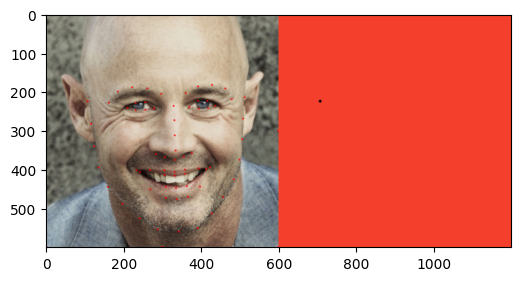

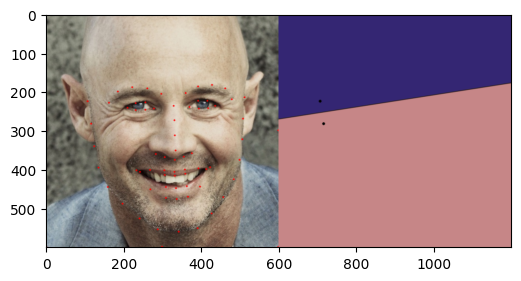

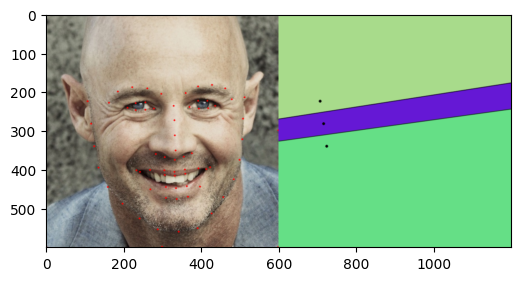

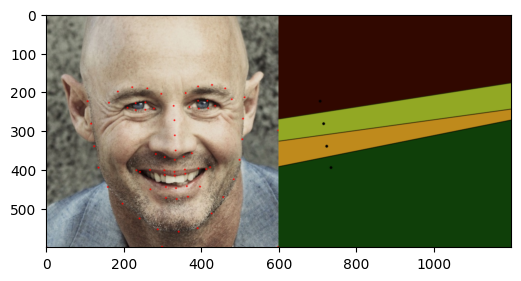

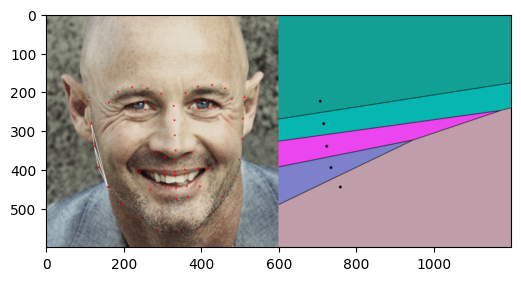

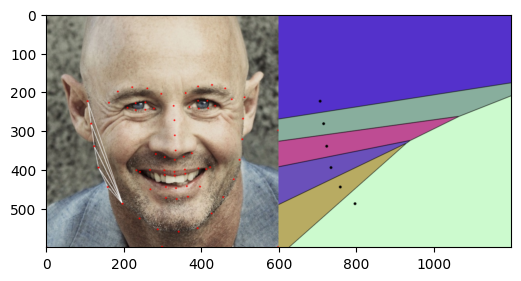

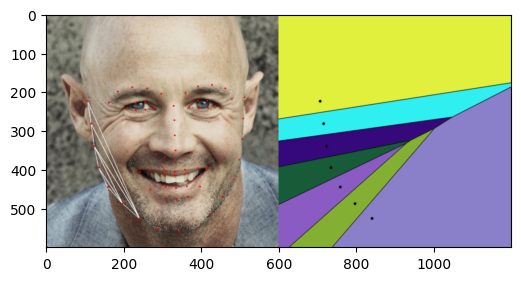

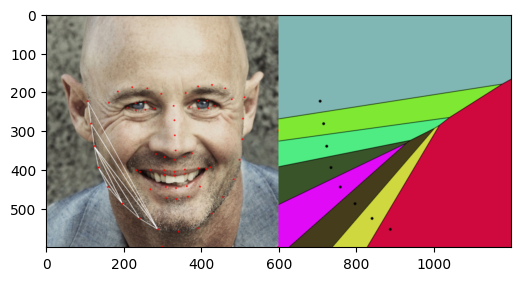

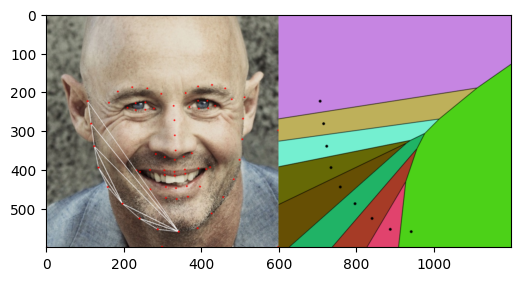

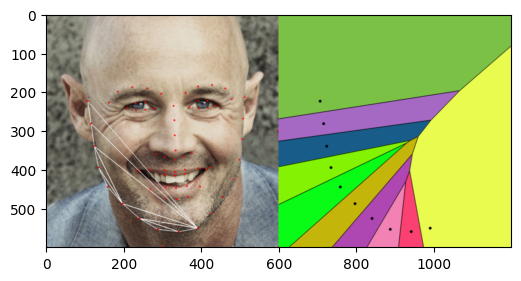

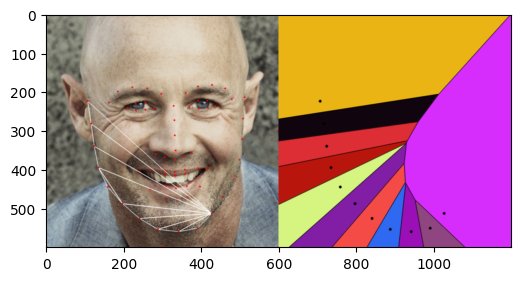

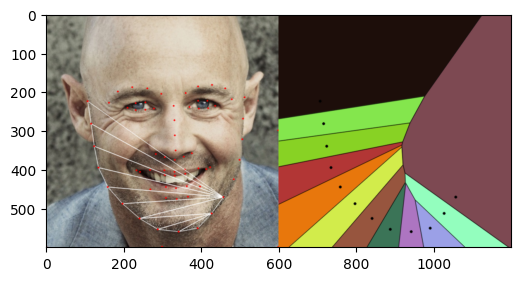

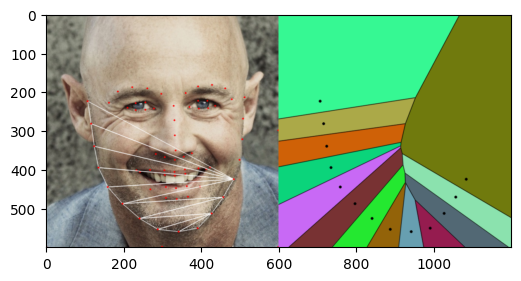

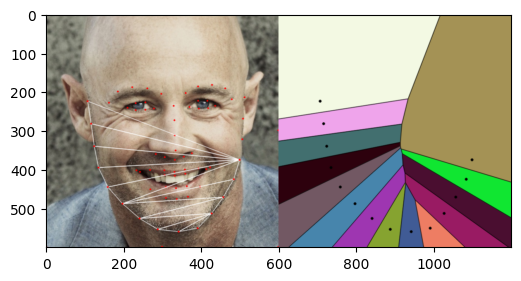

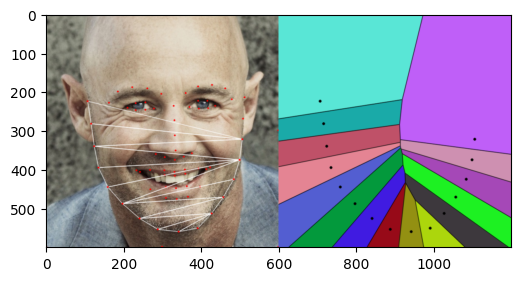

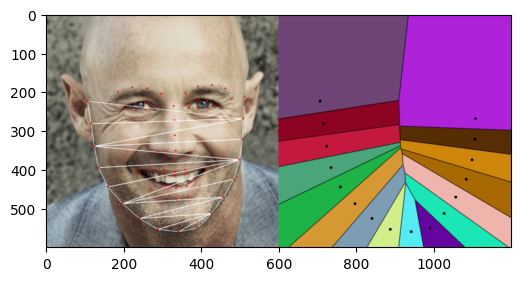

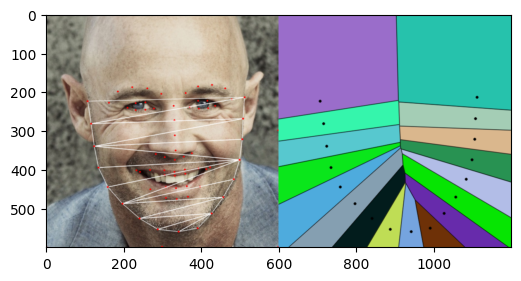

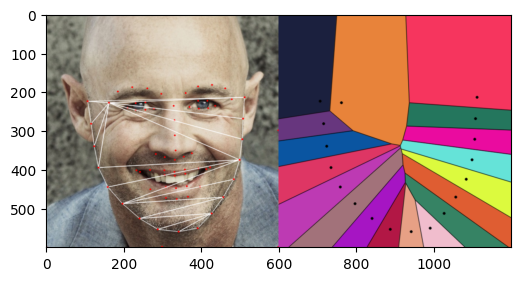

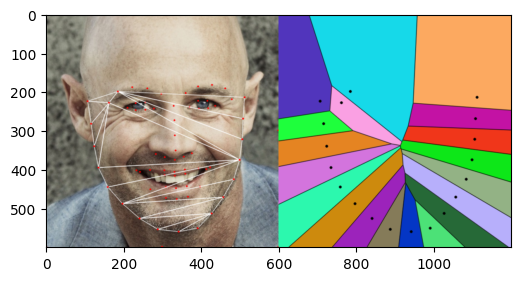

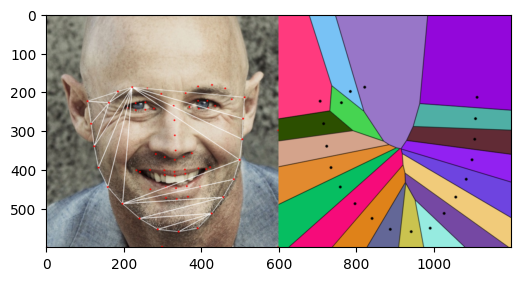

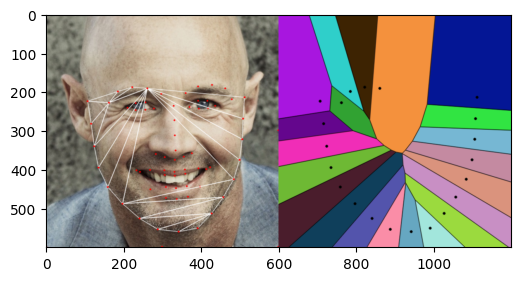

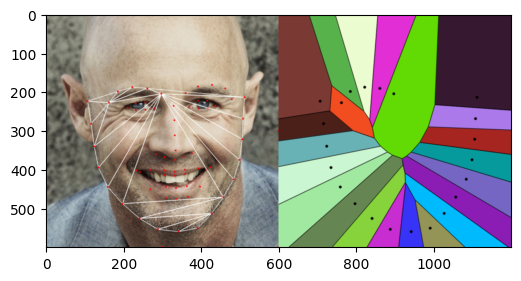

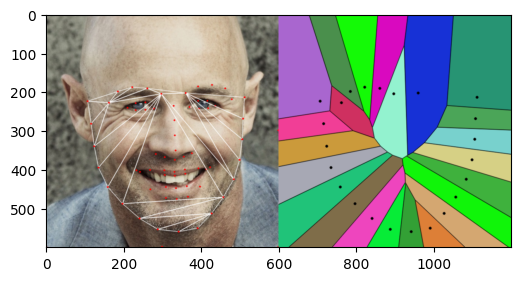

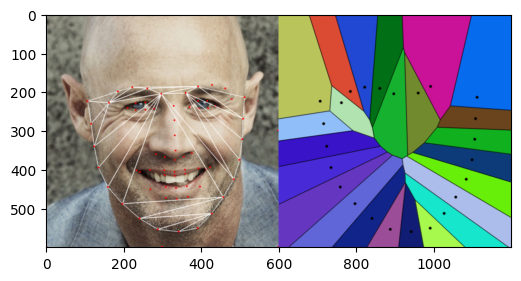

In [ ]:
# Insert points into subdiv
plotPoints = []

for p in points :
    subdiv.insert(p)
    plotPoints.append(p)

    imgDelaunay = img.copy()

    # Draw delaunay triangles and voronoi diagrams
    drawDelaunay(imgDelaunay, subdiv, delaunayColor)
    drawVoronoi(imgVoronoi,subdiv)

    for pp in plotPoints :
        drawPoint(imgDelaunay, pp, pointsColor)

    # Display as an animation
    imgDisplay = np.hstack([imgDelaunay, imgVoronoi])
    plt.imshow(imgDisplay[:,:,::-1])
    plt.show()
    
writeDelaunay(subdiv, points, outputFileName)
print("Writing Delaunay triangles to {}".format(outputFileName))